(799, 640)


<IPython.core.display.Javascript object>


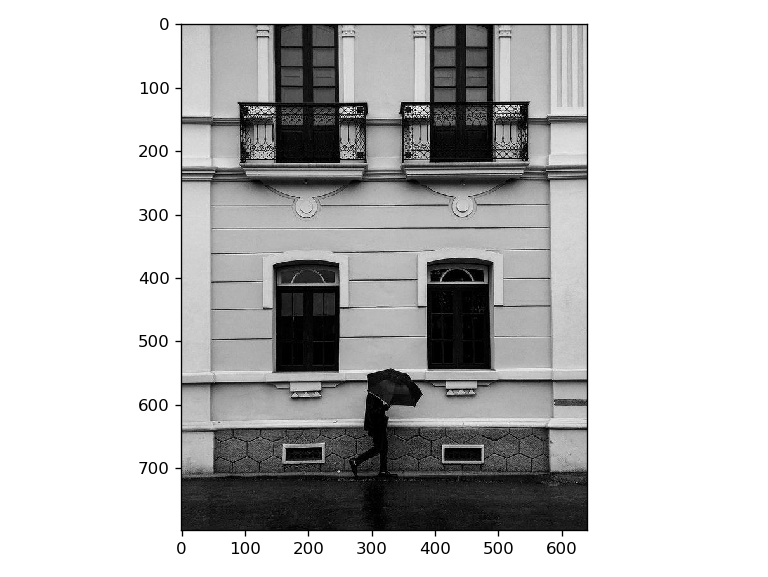

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow,imsave

im = imread('walking.jpg')
print(im.shape)

plt.figure()
imshow(im)
plt.show()

In [18]:
y = 99
x = 249

old_value = im[y,x]
print(old_value)

ksize = 3
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]).astype('float').T
print(kernel)

# Get region
region = im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]
print(region)

189
[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]
[[ 30 189 184]
 [ 28 189 184]
 [ 26 188 184]]


In [19]:
# Output value
output_value = 0
for i in range(ksize):
    for j in range(ksize):
        output_value += region[i,j]*kernel[i,j]
print(output_value)

5.0


In [20]:
# Output for every pixel
im_out = np.zeros((im.shape))
for y in range(ksize//2, im.shape[0]-ksize//2):
    for x in range(ksize//2, im.shape[1]-ksize//2):
        region = im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]
        for i in range(ksize):
            for j in range(ksize):
                im_out[y,x] += region[i,j]*kernel[i,j]

<IPython.core.display.Javascript object>


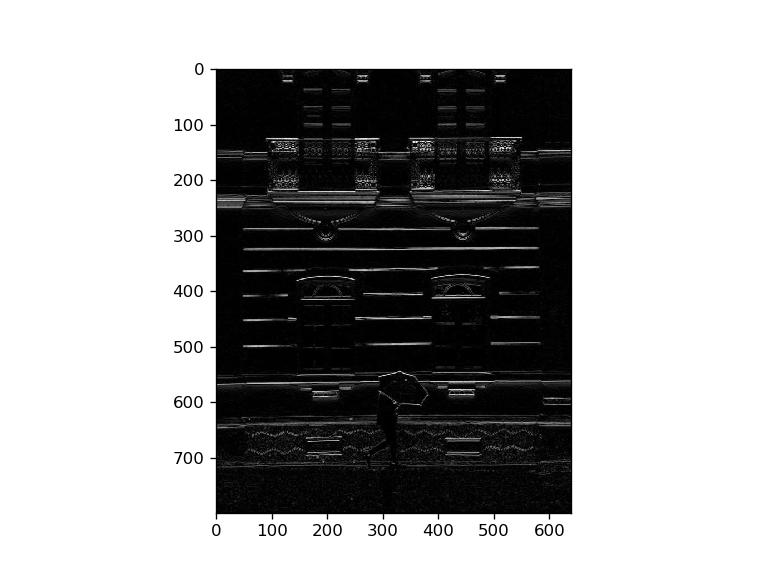

In [21]:
plt.figure()
plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
plt.show()

In [22]:
# Using numpy indexing
im_out = np.zeros((im.shape))
for y in range(ksize//2, im.shape[0]-ksize//2):
    for x in range(ksize//2, im.shape[1]-ksize//2):
        im_out[y,x] = (im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]*kernel).sum()

<IPython.core.display.Javascript object>


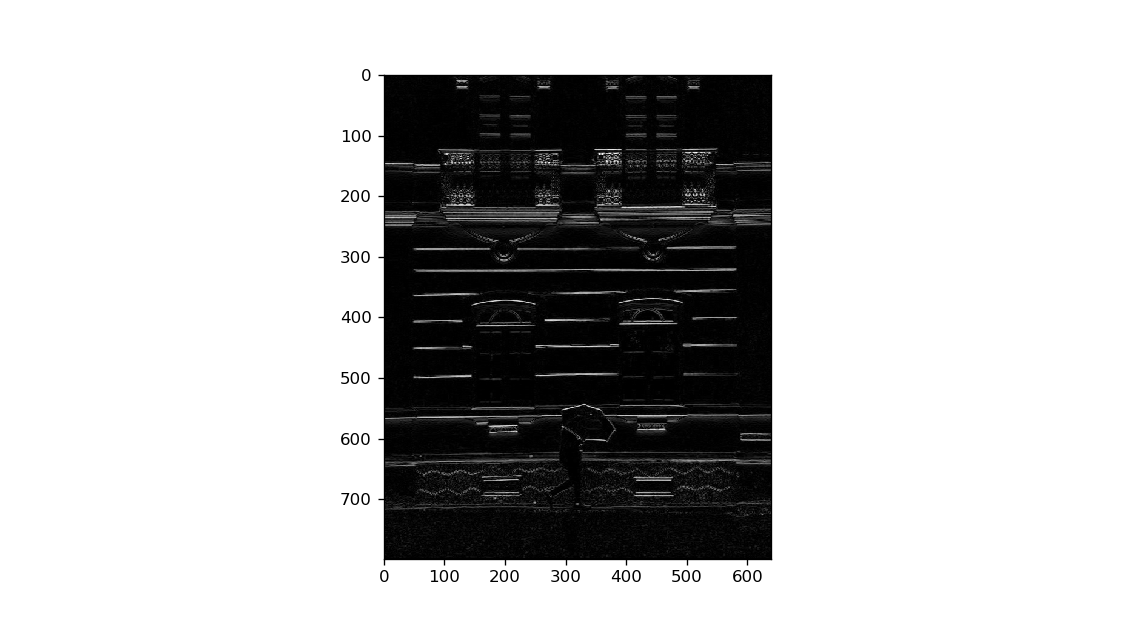

In [23]:
plt.figure()
plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


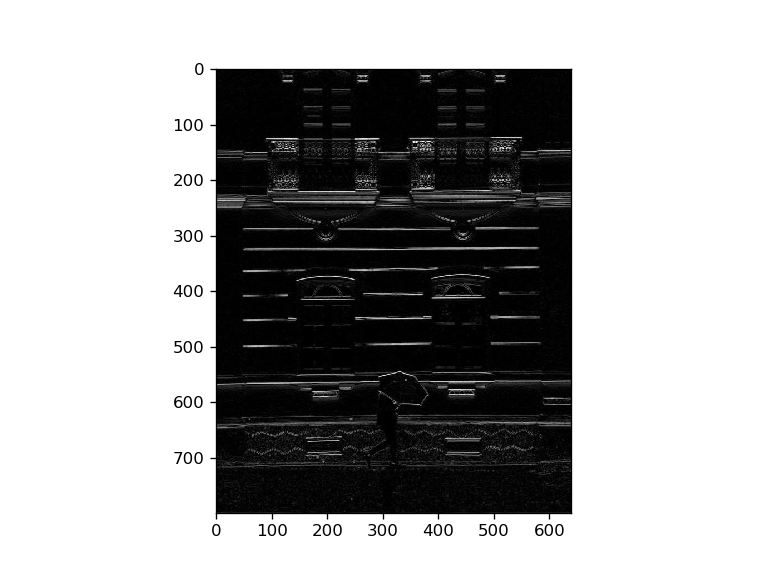

(799, 640) (799, 640)


In [26]:
from scipy.signal import convolve2d

im_out = convolve2d(im, kernel, mode='same')
plt.figure()
plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
plt.show()

print(im.shape, im_out.shape)